In [32]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [33]:
train_df = pd.read_excel("/Users/deepbhattacharjee/Documents/Lab3_data.xls",sheet_name = "2004--2005 Data")
test_df = pd.read_excel("/Users/deepbhattacharjee/Documents/Lab3_data.xls",sheet_name = "2004--2007 Data")                 

In [38]:
class LogisticRegression:
    def __init__(self,X,y,lr,epsilon,maxIteration,remove_index1=[]):
        self.X = X
        self.y = y
        self.lr = lr
        self.epsilon = epsilon
        self.maxIteration = maxIteration
        self.remove_index1=remove_index1
    

    def sigmoid(self,z):
        sig = 1/ (1+ np.exp(-z))
        return sig

    def costFunction(self,X,y):
        #calculates the cost function
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred_.sum()
        return cost

    def remove_index(self,X_train,y_train):
        #Removes multiple rows from the data
        X_train = np.delete(X_train, self.remove_index1, axis = 0)
        y_train = np.delete(y_train, self.remove_index1, axis = 0)
        #print(X_train)
        return X_train,y_train

    def gradient(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad

    def gradientDescent(self,X,y):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.lr * self.gradient(X,y)
            error_current = self.costFunction(X,y) 

            diff = error_prev - error_current
            error_prev = error_current
            errors.append(error_current)
            if diff < self.epsilon:
                print("Stopped")
                break
        self.plot_cost(errors)

    def predict(self,X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def costDerivative(self,y,y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)

        precision = (y & y_hat).sum()/ (y_hat.sum())
        recall = (y & y_hat).sum()/ (y.sum())
        f1score = 2 * (precision) * (recall) / (precision + recall)
        return f1score,recall,precision
  
    def run(self):
        self.X_train = self.X
        self.y_train = self.y
        if self.remove_index1:
            self.X_train, self.y_train = self.remove_index(self.X_train, self.y_train)
    
        self.w = np.ones(self.X_train.shape[1],dtype= np.float64) * 0
        #print(self.w)
        self.gradientDescent(self.X_train,self.y_train)
        print("Training data shape",self.X_train.shape)
        print(self.w)
        y_hat_train = self.predict(self.X_train)
        f1score,recall,precision = self.costDerivative(self.y_train,y_hat_train)
        print("f1core",f1score)
        print("Precision",precision)
        print("Recall",recall)
    
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
    
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                              np.linspace(y_min, y_max, 250))
    
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                c=self.y_train[:], s=50,
                cmap="RdBu", vmin=-.2, vmax=1.2,
                edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
              title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()

In [39]:
train_X,train_y = train_df.values[:,1:],train_df.values[:,0]

In [40]:
lr = LogisticRegression(train_X,train_y,lr=0.000003,epsilon=0.0005,maxIteration=5000,remove_index1=[0,38])

  0%|          | 0/5000 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Stopped


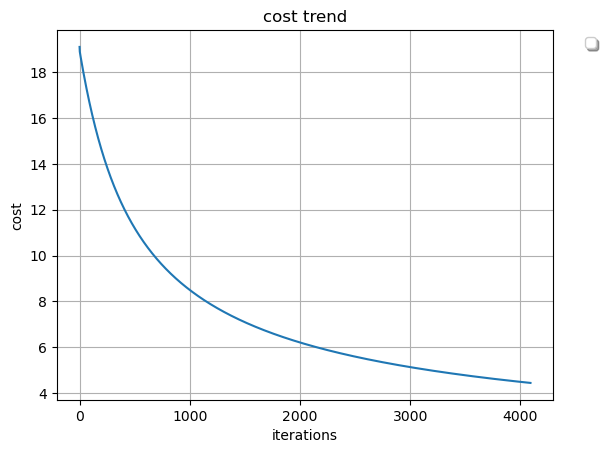

Training data shape (44, 2)
[-0.32002612  0.15657183]
f1core 0.9859154929577464
Precision 0.9722222222222222
Recall 1.0


In [41]:
lr.run()

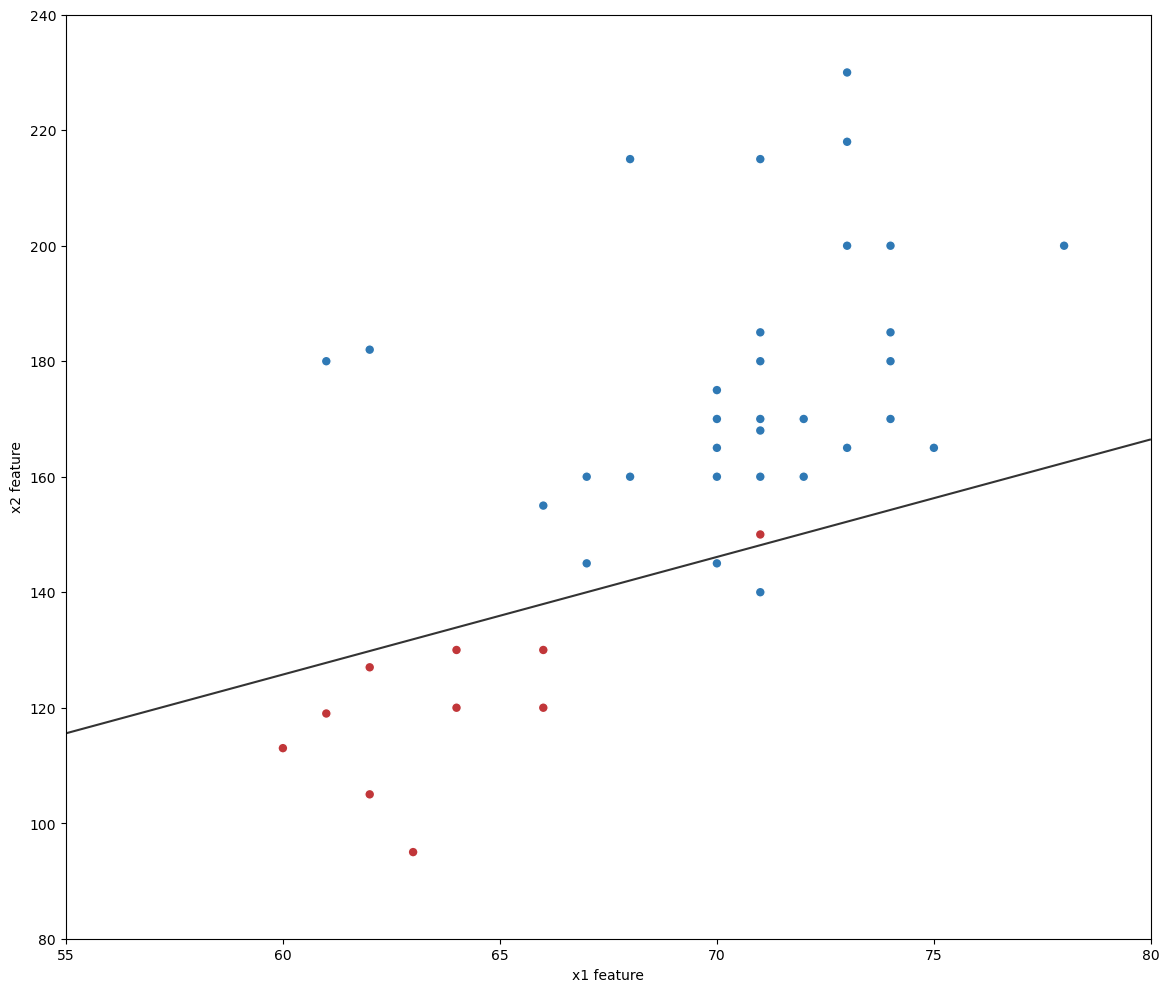

In [520]:
lr.scatterPlt()

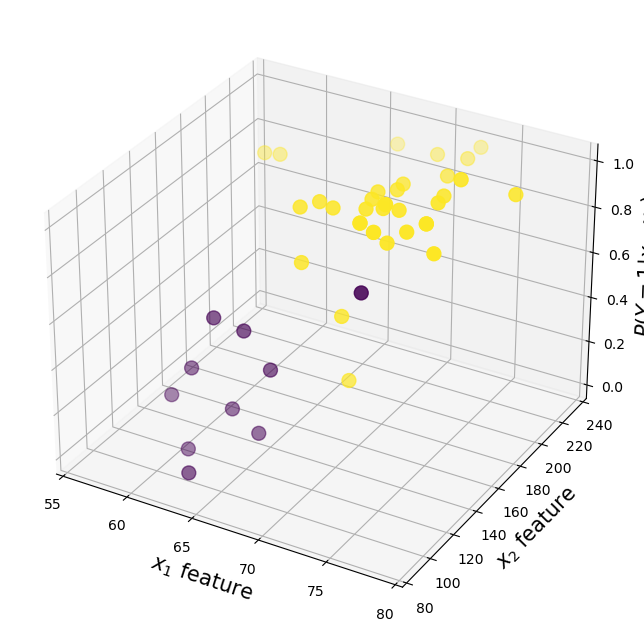

In [521]:
lr.plot()

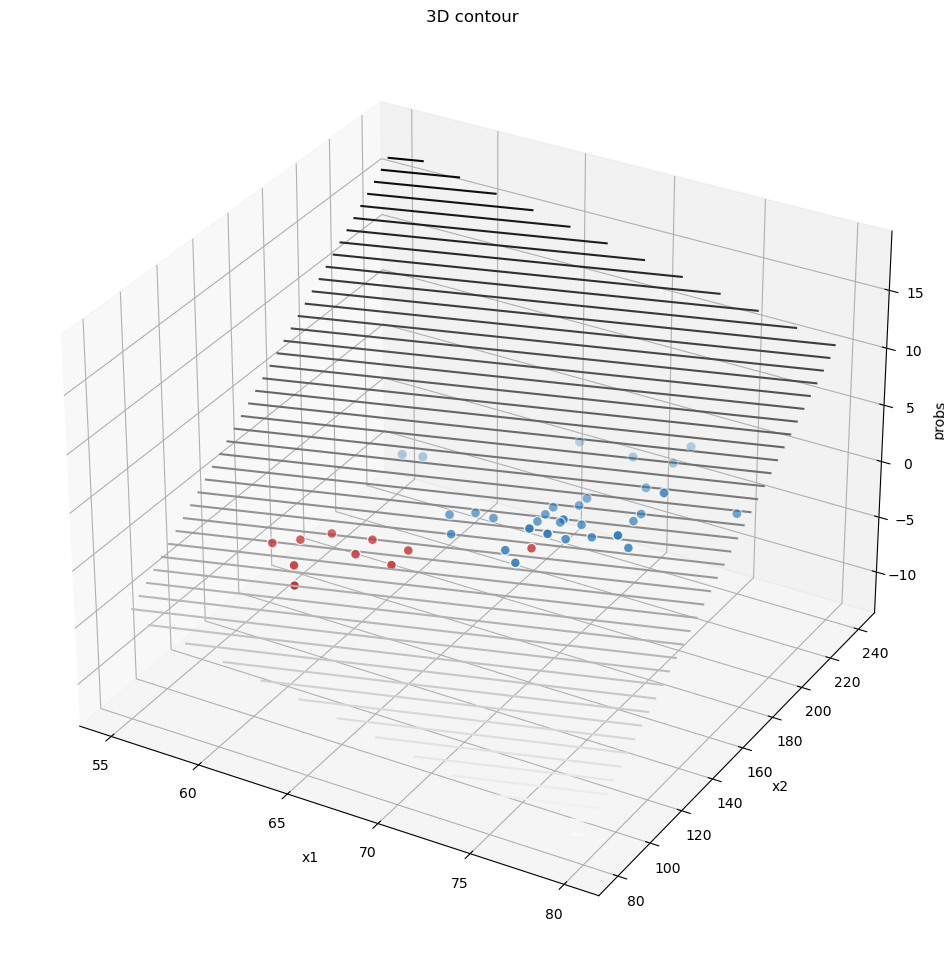

In [522]:
lr.plot3D()

In [523]:
lr1 = LogisticRegression(train_X,train_y,lr=0.000003,epsilon=0.0005,maxIteration=5000,remove = True)

Enter the indexes you want to remove: 0 38


  0%|          | 0/5000 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Stopped


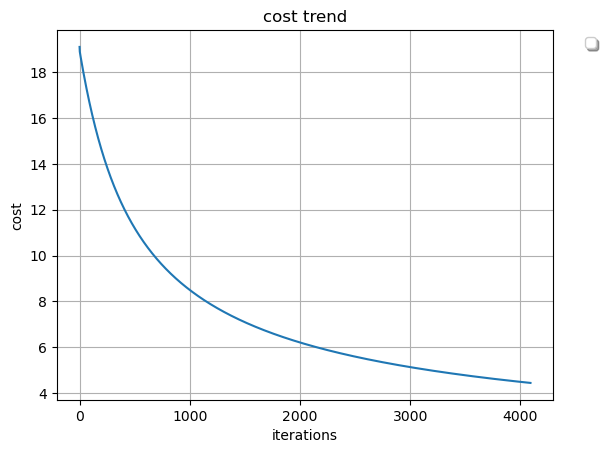

Training data shape (44, 2)
[-0.32002612  0.15657183]
f1core 0.9859154929577464
Precision 0.9722222222222222
Recall 1.0


In [524]:
lr1.run()

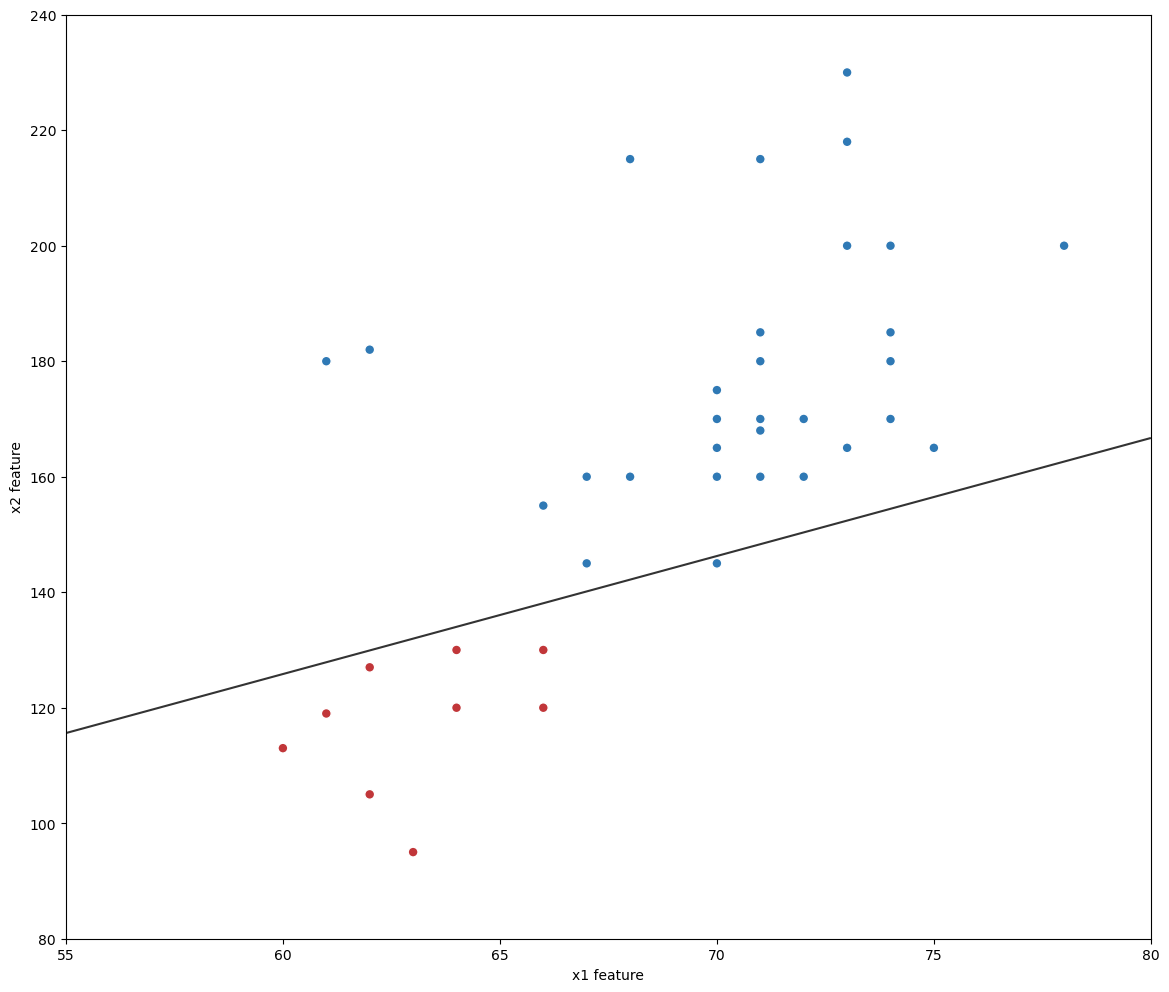

In [505]:
lr1.scatterPlt()

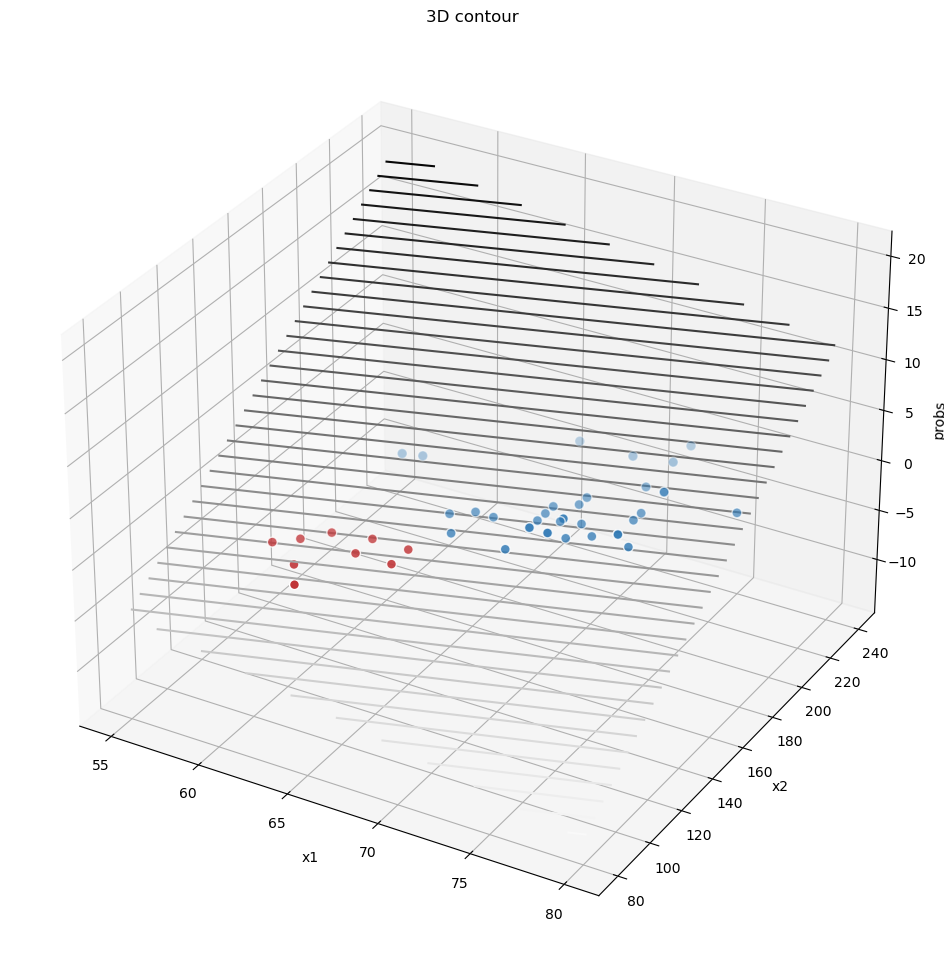

In [506]:
lr1.plot3D()

<font size = '5'>Explain why removing data point number 1 and 39 has a large effect on the predicted probability of the model?<font>

<font size='5'> Answer:<font>

<font size='5'>If we remove the 1st and 39th row form our dataset the accuracy of our model increases as the data points are linearly seperable<font>

In [507]:
lr2= LogisticRegression(train_X,train_y,lr=0.000003,epsilon=0.0005,maxIteration=5000,remove = True)

Enter the indexes you want to remove: 0 2 38 


  0%|          | 0/5000 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Stopped


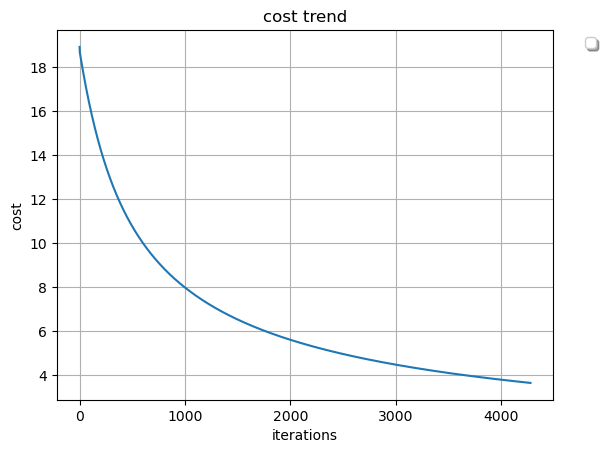

Training data shape (43, 2)
[-0.33344341  0.16160014]
f1core 1.0
Precision 1.0
Recall 1.0


In [508]:
lr2.run()

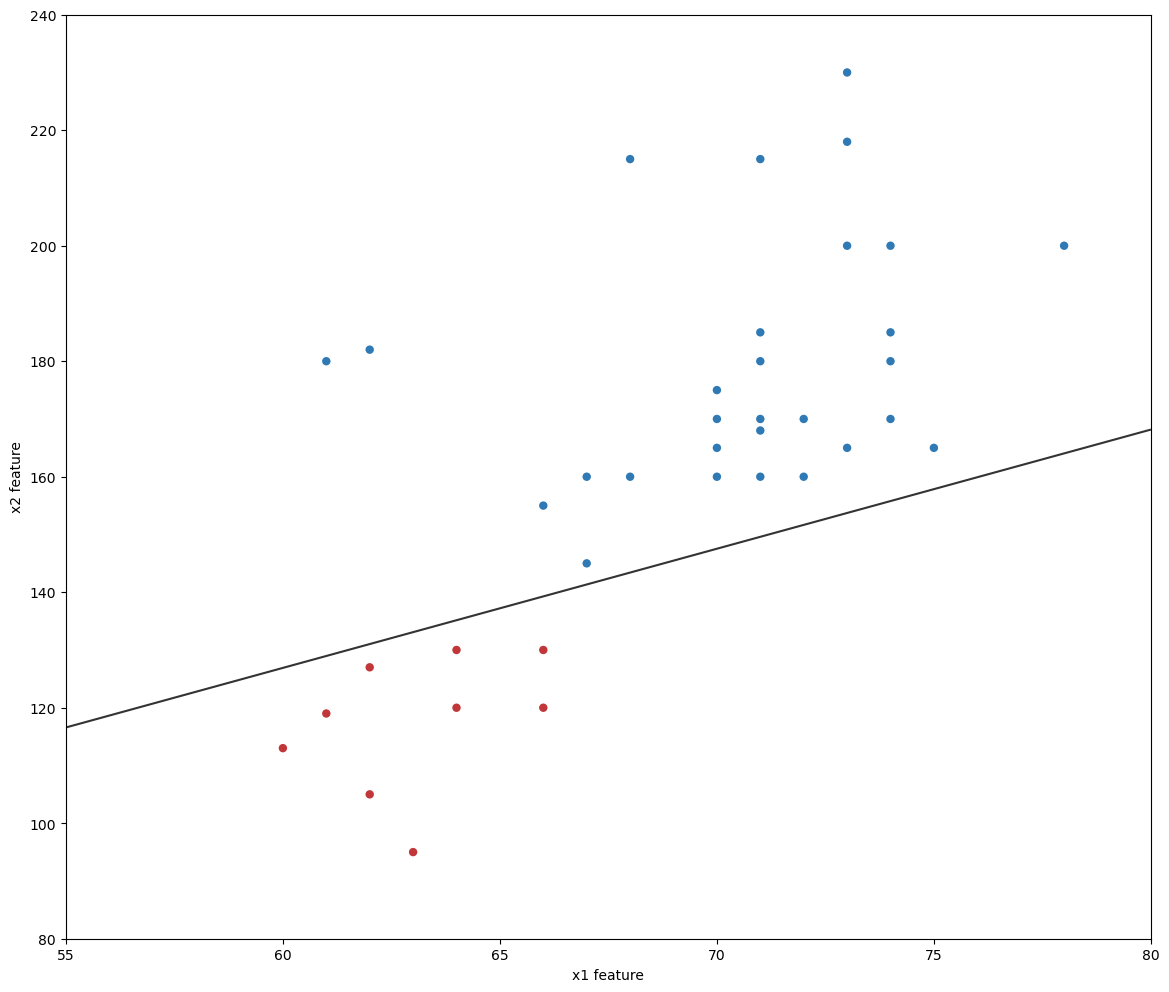

In [509]:
lr2.scatterPlt()

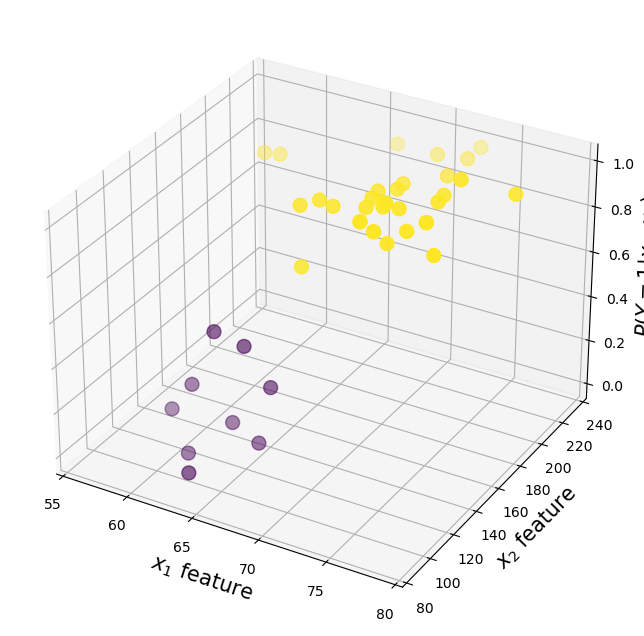

In [510]:
lr2.plot()

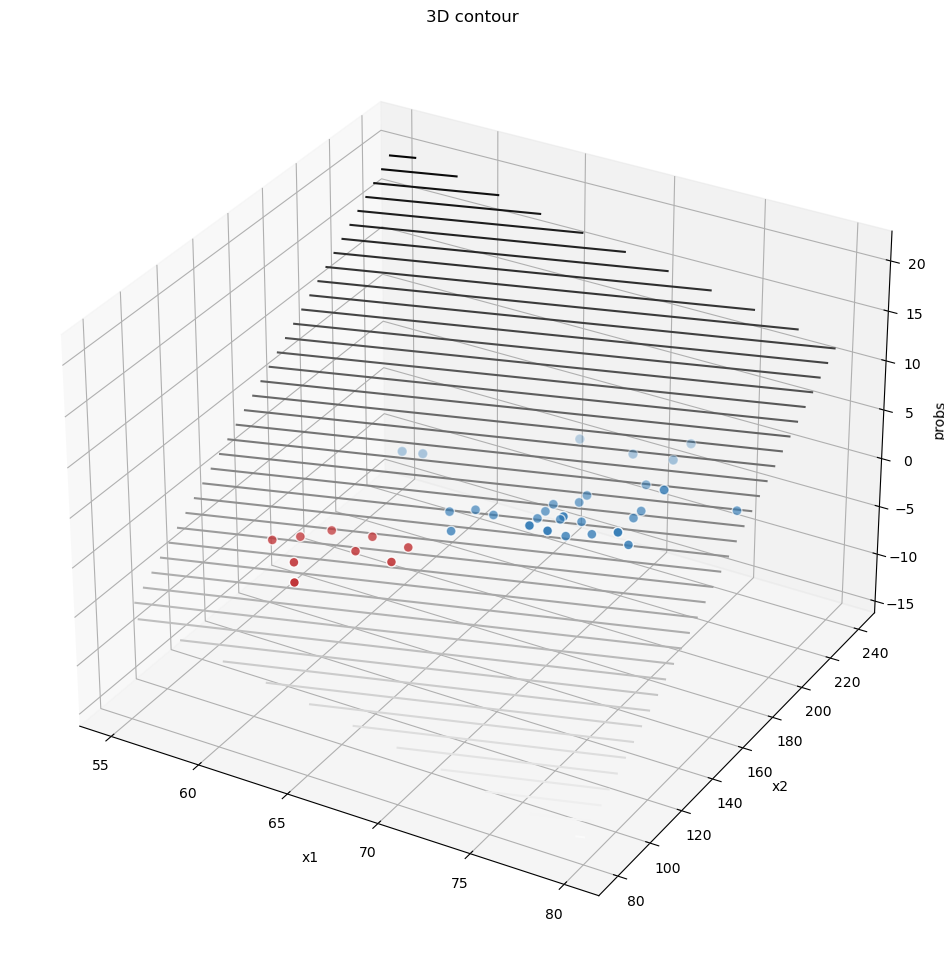

In [511]:
lr2.plot3D()